# Symbolic Equation from Neural Network Output

### Instructions to Run the Program:

1. Ensure you have Python and all required libraries (numpy, tensorflow, matplotlib, sklearn, tensorflow-model-optimization, sympy) installed.

2. Copy the script into a Python file or a Jupyter notebook cell.

3. Run the script. It will automatically execute each step, from data loading to model training, pruning, and evaluation.

4. When prompted, enter values for the input features to see the model's prediction based on the symbolic equation.

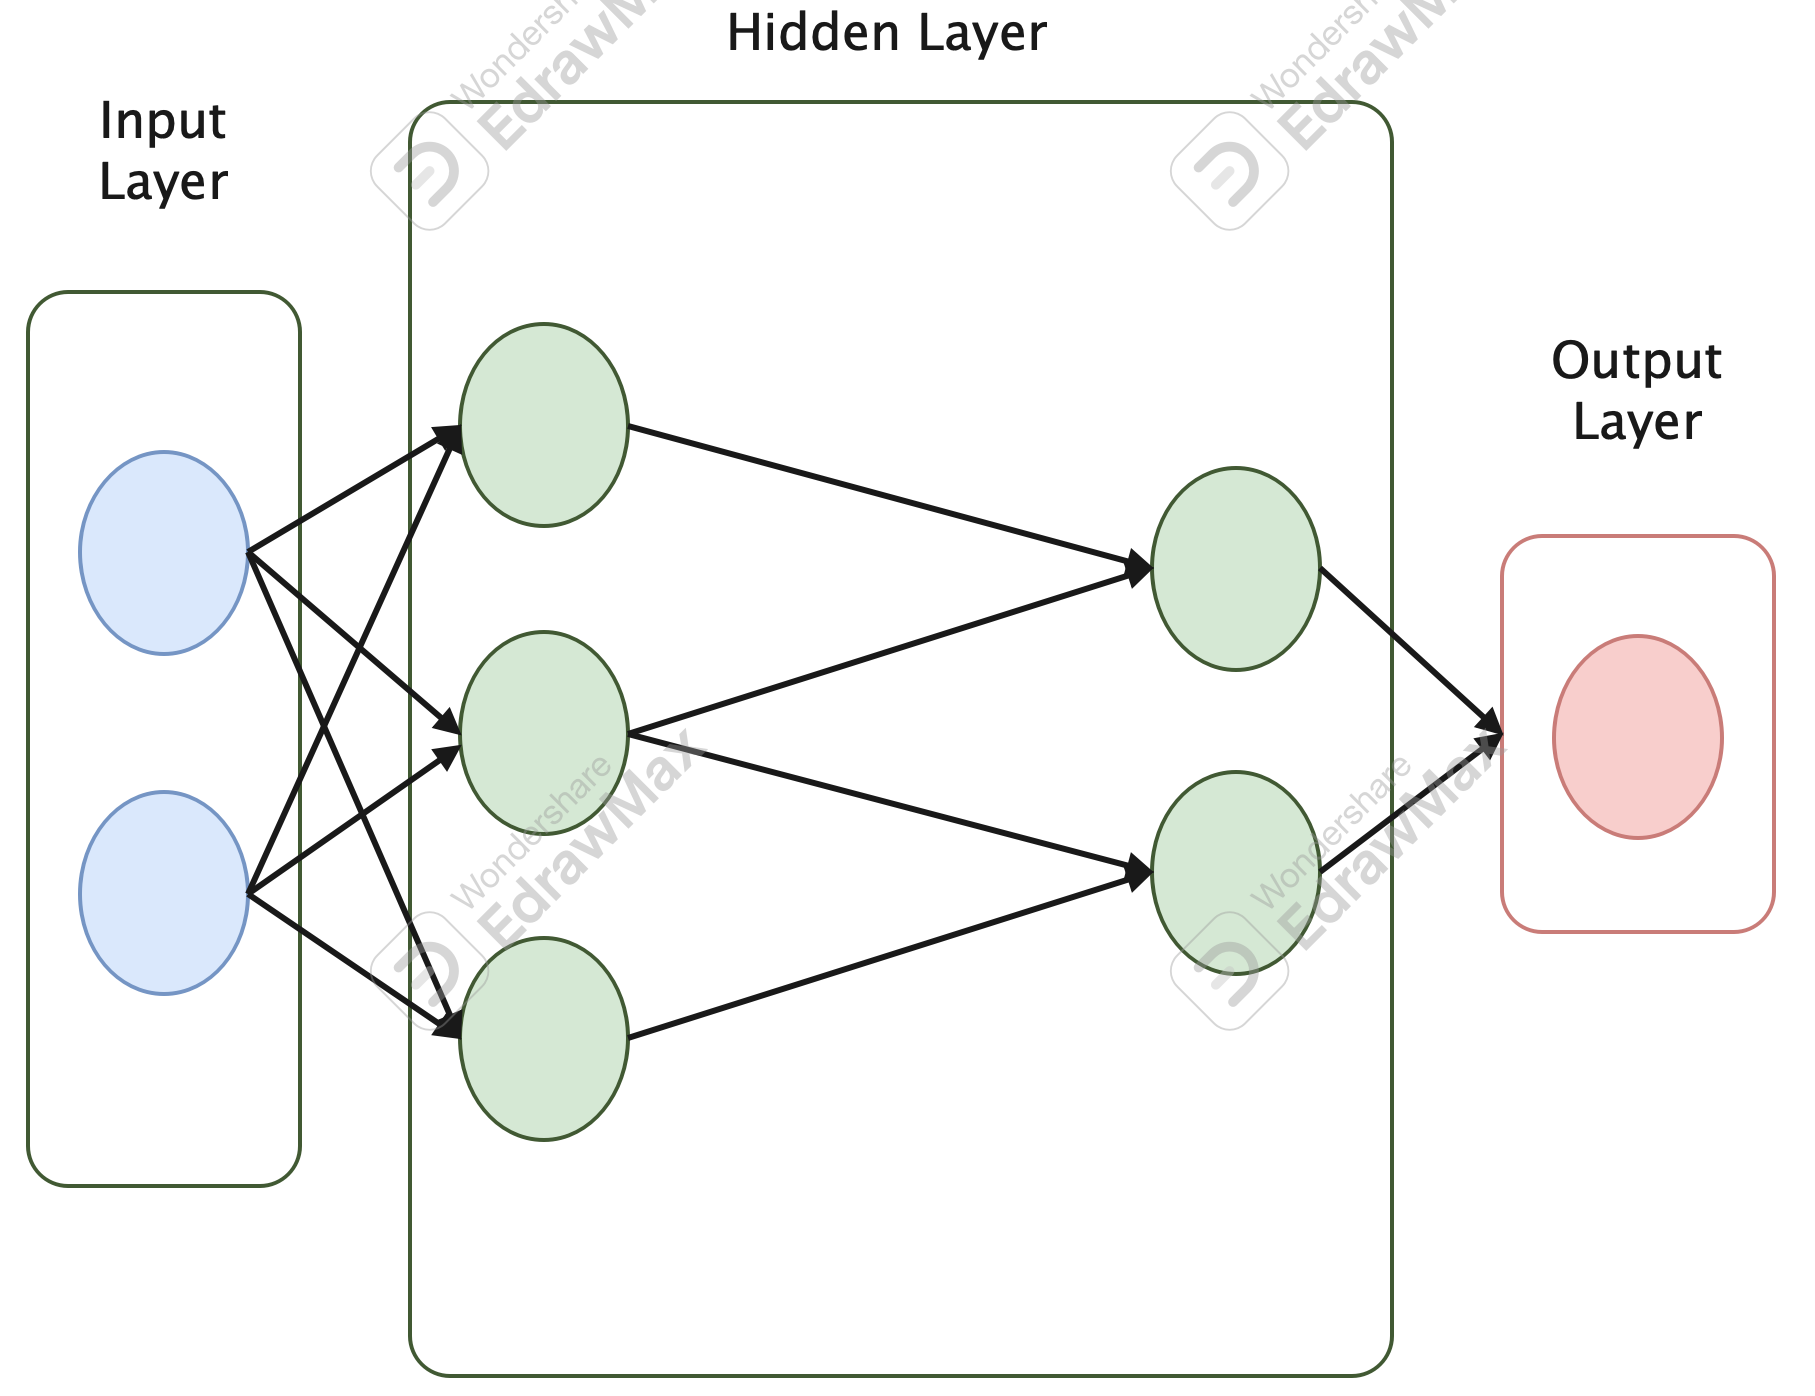

### 1. Training a 2-hidden layer feedforward neural network with sparse connections (as shown in the figure above) on iris dataset and saving the model.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Loading iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# Splitting into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=69)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [8]:
# Building a deep Neural Network
# Initializing the model
from tensorflow.keras import Sequential
model = Sequential()

In [9]:
# Adding the input layer and first hidden layer
from tensorflow.keras.layers import Dense
model.add(Dense(8,activation='relu',input_dim=4))

In [10]:
# Adding second hidden layer
model.add(Dense(8,activation='softmax'))

In [11]:
# Adding output layer
model.add(Dense(3,activation='softmax'))

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=None
)
train = model.fit(X_train_scaled, y_train, batch_size=10, epochs=100, validation_split=0.2, callbacks=callback)

Epoch 1/100
10/10 [==============================] - 0s 6ms/step - loss: 1.1091 - accuracy: 0.3021 - val_loss: 1.0347 - val_accuracy: 0.4583
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 1.1010 - accuracy: 0.3021 - val_loss: 1.0294 - val_accuracy: 0.4583
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 1.0927 - accuracy: 0.3021 - val_loss: 1.0231 - val_accuracy: 0.4583
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 1.0846 - accuracy: 0.3021 - val_loss: 1.0159 - val_accuracy: 0.4583
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 1.0760 - accuracy: 0.3021 - val_loss: 1.0083 - val_accuracy: 0.4583
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 1.0665 - accuracy: 0.3021 - val_loss: 0.9990 - val_accuracy: 0.4583
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 1.0567 - accuracy: 0.3021 - val_loss: 0.9893 - val_accuracy: 0.4583
Epoch 8/100
1

Epoch 59/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5346 - accuracy: 0.9479 - val_loss: 0.4715 - val_accuracy: 0.9583
Epoch 60/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5272 - accuracy: 0.9479 - val_loss: 0.4643 - val_accuracy: 0.9583
Epoch 61/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.9479 - val_loss: 0.4565 - val_accuracy: 0.9583
Epoch 62/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.9479 - val_loss: 0.4499 - val_accuracy: 0.9583
Epoch 63/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5050 - accuracy: 0.9479 - val_loss: 0.4430 - val_accuracy: 0.9583
Epoch 64/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.9479 - val_loss: 0.4362 - val_accuracy: 0.9583
Epoch 65/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.9479 - val_loss: 0.4295 - val_accuracy: 0.9583
Epoch 

In [13]:
# Evaluate the  model
evaluation = model.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 7ms/step - loss: 0.2948 - accuracy: 0.9667


In [14]:
# Installing tfmot
!pip install tensorflow-model-optimization


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [15]:
# Calculate the sparse neural network by prunning the model
import tensorflow_model_optimization as tfmot
initial_sparsity = 0.50
final_sparsity = 0.90
begin_step = 0
end_step = 50
pruning_params = {
        'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
            initial_sparsity=initial_sparsity,
            final_sparsity=final_sparsity,
            begin_step=begin_step,
            end_step=end_step)
    }
prunned_model = tfmot.sparsity.keras.prune_low_magnitude(model, **pruning_params)
pruning_callback = tfmot.sparsity.keras.UpdatePruningStep()


In [16]:
# Compiling and fitting the prunned_model
prunned_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
prunned_model.fit(
    X_train_scaled, 
    y_train, 
    epochs=100, 
    batch_size=10, 
    callbacks= pruning_callback, 
    validation_split=0.2
)

Epoch 1/100
10/10 [==============================] - 1s 6ms/step - loss: 0.2973 - accuracy: 0.9479 - val_loss: 0.2409 - val_accuracy: 1.0000
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.9583 - val_loss: 0.2364 - val_accuracy: 1.0000
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2883 - accuracy: 0.9583 - val_loss: 0.2321 - val_accuracy: 1.0000
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2844 - accuracy: 0.9583 - val_loss: 0.2280 - val_accuracy: 1.0000
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2803 - accuracy: 0.9583 - val_loss: 0.2245 - val_accuracy: 1.0000
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2770 - accuracy: 0.9583 - val_loss: 0.2216 - val_accuracy: 1.0000
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.9583 - val_loss: 0.2180 - val_accuracy: 1.0000
Epoch 8/100
1

Epoch 59/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1597 - accuracy: 0.9688 - val_loss: 0.1371 - val_accuracy: 0.9583
Epoch 60/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1582 - accuracy: 0.9688 - val_loss: 0.1355 - val_accuracy: 0.9583
Epoch 61/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1578 - accuracy: 0.9688 - val_loss: 0.1323 - val_accuracy: 1.0000
Epoch 62/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1560 - accuracy: 0.9688 - val_loss: 0.1349 - val_accuracy: 0.9583
Epoch 63/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1543 - accuracy: 0.9688 - val_loss: 0.1351 - val_accuracy: 0.9583
Epoch 64/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1529 - accuracy: 0.9688 - val_loss: 0.1348 - val_accuracy: 0.9583
Epoch 65/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.9688 - val_loss: 0.1358 - val_accuracy: 0.9583
Epoch 

In [17]:
# Evaluate the prunned model
prunned_evaluation = prunned_model.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 7ms/step - loss: 0.1080 - accuracy: 0.9667


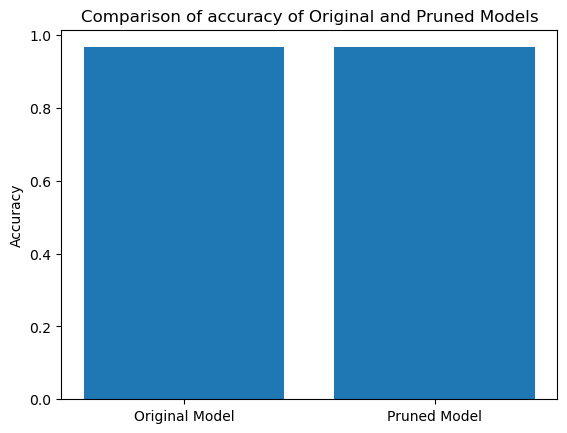

In [26]:
# Plot the comparison of Accuracy
labels = ['Original Model', 'Pruned Model']
accuracies = [evaluation[1], prunned_evaluation[1]]
plt.bar(labels, accuracies)
plt.ylabel('Accuracy')
plt.title('Comparison of accuracy of Original and Pruned Models')
plt.show()

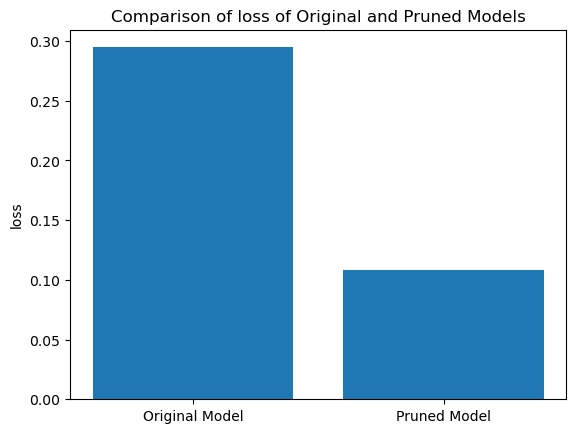

In [27]:
# Plot the comparison of loss
labels = ['Original Model', 'Pruned Model']
loss = [evaluation[0], prunned_evaluation[0]]
plt.bar(labels, loss)
plt.ylabel('loss')
plt.title('Comparison of loss of Original and Pruned Models')
plt.show()

In [36]:
# Saving the trained model
prunned_model.save('My Model')

INFO:tensorflow:Assets written to: My Model/assets


INFO:tensorflow:Assets written to: My Model/assets


### 2. Extracting the symbolic expression representing the output layer of the neural network using Sympy

In [37]:
# Load the saved model
loaded_model = tf.keras.models.load_model('My Model')

In [41]:
# Installing Simplify
!pip install simplify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.0/750.0 kB 2.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.2/160.2 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 685.7/685.7 kB 3.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [46]:
# Extract the weights and biases of the output layer
output_layer_weights = loaded_model.layers[-1].get_weights()[0] # Get the weights of the weights of the output layer of NN
output_layer_biases = loaded_model.layers[-1].get_weights()[1] # Get the bias of the output layer

In [48]:
# Create symbolic variables for each of the input features
import sympy
x0, x1, x2, x3 = sympy.symbols('x0 x1 x2 x3')

In [50]:
# Create a symbolic expression for the output layer
output_layer_expr = output_layer_biases[0]
input_features = [x0, x1, x2, x3]
for i in range(4):
    output_layer_expr += output_layer_weights[i][0] * input_features[i]

In [51]:
# Simplify the expression
output_layer_expr = sympy.simplify(output_layer_expr)

In [52]:
output_layer_expr

-0.856847286224365*x0 + 2.21044588088989*x1 - 0.204218402504921*x2 - 1.30816495418549*x3 - 0.490725874900818

### 3. Constructing a symbolic equation using the input features as variables.

In [57]:
values = sympy.Symbol('input_value')
equation = sympy.Eq(output_layer_expr,values)
print('Symbolic equation: ', equation)

Symbolic equation:  Eq(-0.856847286224365*x0 + 2.21044588088989*x1 - 0.204218402504921*x2 - 1.30816495418549*x3 - 0.490725874900818, input_value)


### 4. Taking users input for input features and using the symbolic equation to compute and display the corresponding predicted output.

In [58]:
values = {}
for symbol in [x0, x1, x2, x3]:
    user_input = float(input(f'Enter value for {symbol}: '))
    values[symbol] = user_input
equation_with_values = equation.subs(values)
expression_with_values = output_layer_expr.subs(values)
predicted_output = sympy.simplify(expression_with_values)
print(f'Predicted output: {predicted_output}')

Enter value for x0: 2
Enter value for x1: 3
Enter value for x2: 4
Enter value for x3: 3
Predicted output: -0.314451277256012
